In [1]:
import pandas as pd

train = pd.read_csv('tweets_data_clean.csv',encoding="utf-8")
train.text = train.text.astype(str)
train =  train.iloc[:,1:3] # Removiendo columna de id
train.head()

,text,AG
0,easyjet quiere duplicar el número de mujeres p...,0
1,el gobierno debe crear un control estricto de ...,0
2,yo veo a mujeres destruidas por acoso laboral ...,0
3,yo soy respetuoso con los demás sólamente les...,0
4,antonio caballero y como ser de mal gusto e ig...,0


In [90]:
test = pd.read_csv('test_clean.csv', encoding="utf-8")
test.text = test.text.astype(str)
test = test.iloc[:,1]
test.head()

0     cállate la puta que me pario kohan vos tbn va...
1                     estas navidades mi polla mereces
2    si no aprobas te pego una cojida que no te la ...
3     a no entendiste nada ud le habla a un israelí...
4     es normal en cataluña los indepes prefirieron...
Name: text, dtype: object

## Entrenamiento de la red neuronal

In [2]:
# Importando librerias
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, Dense, GlobalMaxPool1D, Dropout, Flatten, Bidirectional, LSTM
from keras.models import Sequential

In [91]:
num_words=(2000)
max_len=200
tokenizer=Tokenizer(2000)
tokenizer.fit_on_texts(train.text)
train_sequences=tokenizer.texts_to_sequences(train.text)
test_sequences=tokenizer.texts_to_sequences(test)

In [92]:
padded_train = pad_sequences(train_sequences, maxlen=max_len)
padded_test = pad_sequences(test_sequences, maxlen=max_len)

In [36]:
y = train.AG.values

In [37]:
train_sequences[:1]

[[218, 9, 1, 69, 1714, 44, 23, 9, 1715]]

In [40]:
batch_size = 32
epoch = 4
model=Sequential([Embedding(num_words,32,input_length=max_len),
                 Bidirectional(LSTM(64,return_sequences=True)),
                 GlobalMaxPool1D(),
                 Dense(60,activation='relu'),
                  Dense(1,activation='sigmoid')
                 ])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')
history = model.fit(padded_train,y,batch_size,epochs=epoch, validation_split=.25, steps_per_epoch=100)

Epoch 1/4
100/100 [==============================] - 9s 92ms/step - loss: 0.6211 - accuracy: 0.6669 - val_loss: 0.5947 - val_accuracy: 0.6945
Epoch 2/4
100/100 [==============================] - 9s 87ms/step - loss: 0.4436 - accuracy: 0.8001 - val_loss: 0.4834 - val_accuracy: 0.7745
Epoch 3/4
100/100 [==============================] - 9s 87ms/step - loss: 0.3220 - accuracy: 0.8738 - val_loss: 0.5156 - val_accuracy: 0.7601
Epoch 4/4
100/100 [==============================] - 9s 87ms/step - loss: 0.2484 - accuracy: 0.9084 - val_loss: 0.6152 - val_accuracy: 0.7556


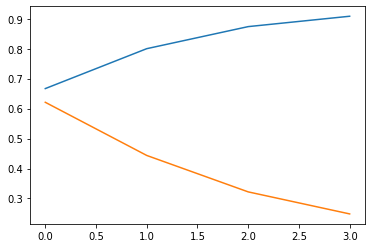

In [42]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label="Precisión")
plt.plot(history.history['loss'], label="Perdida")

In [96]:
predicted = model.predict(padded_test)

In [97]:
import numpy as np
np.set_printoptions(formatter={'float_kind':'{:2f}'.format})

for i in range(len(test)):
    print(test[i],predicted[i])

 cállate la puta que me pario kohan vos tbn vas a tener que rendir cuentas a nosotros caradura [0.039455]
estas navidades mi polla mereces [0.195921]
si no aprobas te pego una cojida que no te la vas a olvidar nunca y te acabo en la cara queres ups desaprobe [0.166772]
 a no entendiste nada ud le habla a un israelí que vive en argentina así yo nací en israel sudaca es ud por vivir en una isla llena de pingüinos y si querés probar mandame un escuadrón de escocesas soy lindo rico y vivo en el mejor país del mundo [0.243946]
 es normal en cataluña los indepes prefirieron inmigración islamica q no sabian hablar español y así les enseñan catalufo antes q inmigración americana que hablan español y eso sería unpecado ahora tenemos q jodernos porque en cualquier momento nos ponen una bomba en el culo httpstcoygfkywxpi [0.101788]
 incluyendo mundo educativo conociendo consecuencias y legislación del menor rastrosrestos de machismo aun así no lo entiendo [0.004421]
tu eres una hija de puta en la

 callate puta [0.891743]
te mereces un oscar por puta que cuál óscar está bueno ¡presentelo   [0.267348]
 la pena [0.270854]
nos están atacando esto no es para la guardia civil es trabajo para el ejército más de  inmigrantes saltan la valla de ceuta y hieren a siete agentes con cal viva httpstcooucklamezp vía  [0.390066]
el gobierno expulsa a los  inmigrantes que asaltaron ayer la valla de ceuta y otras  noticias que debes saber hoy httpstcoxpxuacjsl httpstcocwjnjoj [0.012886]
eh tu eres una puta [0.881783]
 ok sudaca rico y con olor a limn [0.831379]
 pues cállate la puta boca imbécil olvidame [0.012853]
 callate gilaaaaaaa que todos dicen eso pero el pan dulce es lo mejor que hay en la puta vida [0.034223]
cientos de inmigrantes saltan la valla fronteriza de ceuta han logrado esquivar a la guardia civil arrojando a los agentes cal viva ácido de baterías de automóvil y bolas de heces humanas httpstcogxgwuwws [0.465555]
 las concertinas eran una solución contundente y que cuando viajas

In [51]:
#Saving the model
from keras.models import load_model

model.save('spanish_OLD_model.h5')

In [12]:
import pandas as pd
from keras.models import load_model
# Importando librerias
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, Dense, GlobalMaxPool1D, Dropout, Flatten, Bidirectional, LSTM
from keras.models import Sequential

new_model = load_model('spanish_OLD_model.h5')
test2 = pd.read_csv('myTest.csv')
test2 = test2.text.astype(str)
num_words2=(2000)
max_len2=200
tokenizer2=Tokenizer(2000)
tokenizer2.fit_on_texts(train.text)
train_sequences2=tokenizer2.texts_to_sequences(train.text)
test_sequences2=tokenizer2.texts_to_sequences(test2)
padded_test2 = pad_sequences(test_sequences2, maxlen=max_len2)

new_model.predict(padded_test2)

array([[0.05551171]], dtype=float32)